# **Prediction using Supervised Machine Learning**

**Libraries Used**: numpy, pandas, matplotlib, scikit-learn

**Dataset Used**: Student Scores Dataset (https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv file
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
#viewing the first 5 rows to know the content
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking if there is any null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

So, since there are no NULL values, we don't need to do any data cleaning. We now plot the dataset and check the relationship between the feature and the label.

Note: If there are NULL values in the database, perform any one of the following:


*   Replace with the mean / median / mode value of the column values
*   Delete the rows, if they don't affect the database
*   Predicting the values with ML



It solely depends on the database which to perform. But keeping in mind, the analysis should be closer to perfect.



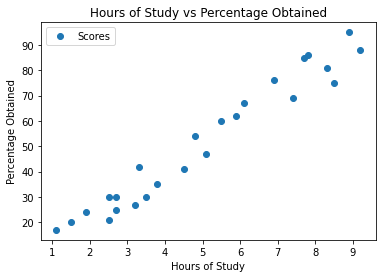

In [5]:
#plotting the distribution
data.plot(x='Hours', y='Scores',style = 'o')
plt.title('Hours of Study vs Percentage Obtained')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Obtained')
plt.show()

From the above plot we can see that there is a positive linear relation between "Hours of Study" and "Percentage Obtained"

## **Machine Learning Model (Simple Linear Regression)**

### **Preparing the data**

We prepare the data now. It is divided into features(input data) and labels(output data)

In [6]:
#dividing data into features and labels
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

We split the data into test and training sets

In [7]:
#splitting data into training and test sets using sckit-learn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

We create and train the model

In [8]:
#training the linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

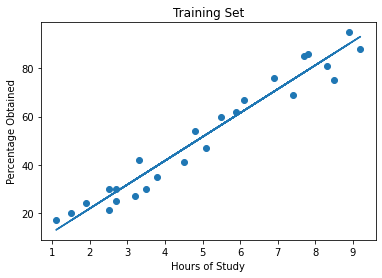

In [9]:
#regression line
reg_line=regressor.coef_*x+regressor.intercept_
#plotting the training set
plt.scatter(x, y)
plt.plot(x, reg_line)
plt.title('Training Set')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Obtained')
plt.show()

So, our model is ready. Let's now test it.

In [10]:
#predicting the test set
y_pred=regressor.predict(x_test)

In [11]:
#comparing actual test labels vs predicted test labels
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


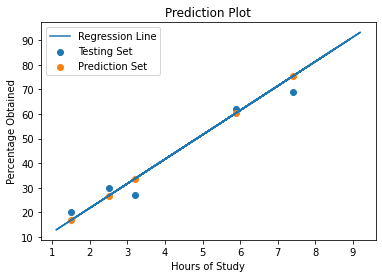

In [12]:
#plotting test set and predicted set to get a better understanding
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.plot(x, reg_line)
plt.title('Prediction Plot')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Obtained')
plt.legend(["Regression Line","Testing Set","Prediction Set"])
plt.show()


Visually, it's predictions are not that accurate. Let's see the errors and score.

In [13]:
#evaluating the model
from sklearn import metrics
mse=metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Mean Squared Error: 21.598769307217456
Variance score: 0.95


This is not that bad. This is because we have to depend on only one feature to predict the label

Let's run a sample data prediction

In [14]:
#sample data testing (My Own)
hrs=[[8]]
sample_pred=regressor.predict(hrs)
print("Prediction Score Obtained:",sample_pred[0])

Prediction Score Obtained: 81.30341188657258


One more sample

In [15]:
hours = [[9.25]]
score_pred = regressor.predict(hours)
print("Prediction Score Obtained:",score_pred[0])

Prediction Score Obtained: 93.69173248737539


**Conclusion:**

So, as per our analysis, the more a student studies, the more score he/she gets.